# Analisi infetti e deceduti

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from aidam.math_utils import moving_function_robust
from aidam.miscellanea_utils import find_matlabstyle
from aidam.aicharts import get_subplot_cells_sequence, confplot_ax, auto_grid_shape
import pickle as pkl
import numpy as np
import pandas as pd

## Lettura dati

In [2]:
data_file='stored_data.pkl'

infile=open(data_file,'rb')
trend=pkl.load(infile)
regioni=pkl.load(infile)
giorni=pkl.load(infile)
giorno_settimana=pkl.load(infile)
popolazione=pkl.load(infile)
infile.close()

day_counter=list(range(len(giorni)))

print('Giorni osservati: %d'%len(giorni))
print('Primo giorno: %s'%giorni[0])
print('Ultimo giorno: %s'%giorni[-1])

Giorni osservati: 280
Primo giorno: 2020-02-24T18:00:00
Ultimo giorno: 2020-11-29T17:00:00


### Inserimento di eventi notevoli riferiti a date

In [3]:
lockdown={'data':'2020-03-10',
          'id_giorno':15,
          'desc':'Lockdown'}

scuole_chiuse={'data':'2020-03-04',
               'id_giorno':9,
               'desc':'Scuole chiuse'}

fase_2={'data':'2020-05-04',
               'id_giorno':71,
               'desc':'Fase2'}


eventi=[scuole_chiuse,lockdown, fase_2]

Calcolo le posizioni nella grid dei subplot dove mettere le figure delle varie regioni e parametri delle figure

In [4]:
# per i subplot determina la griglia
grid_shape=(7,3)
grid_seq=get_subplot_cells_sequence(grid_shape)

# dimensioni figure (figsize) per figure singole e figure composte (subplot)
figsize_single=(9,6)
figsize_multi=(16,16)


## Grafici Nazionali

In [5]:
indicatori_selected=['totale_casi',
                     'nuovi_positivi',
                     'guariti_giornalieri',
                    'variazione_totale_positivi',
                    'totale_positivi',
                    'deceduti_giornalieri']

days_back=60

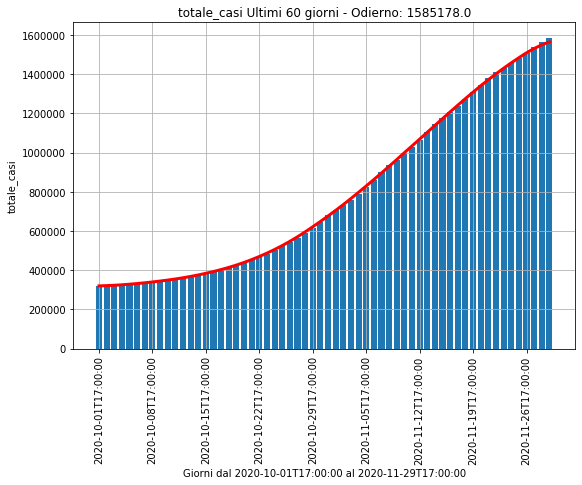

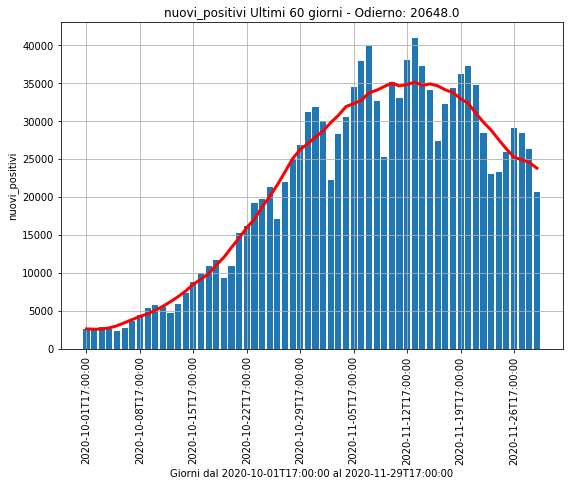

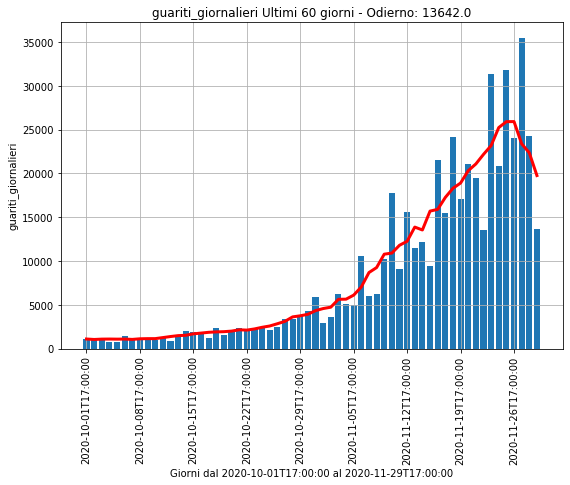

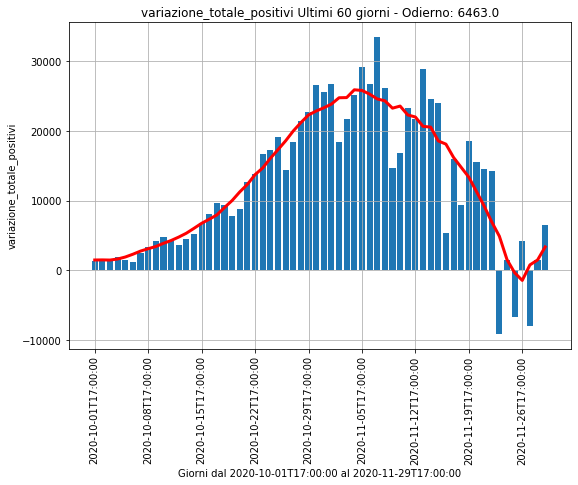

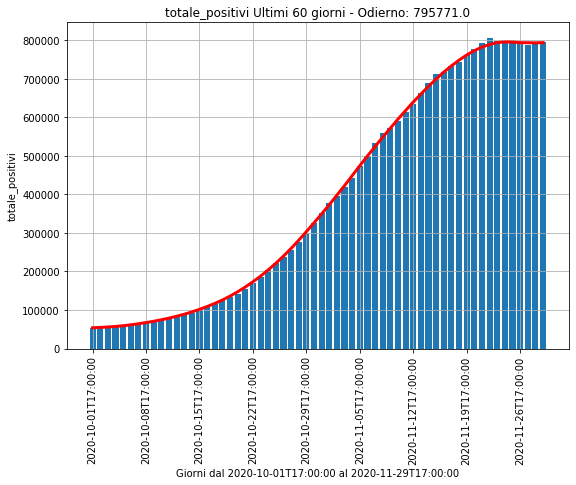

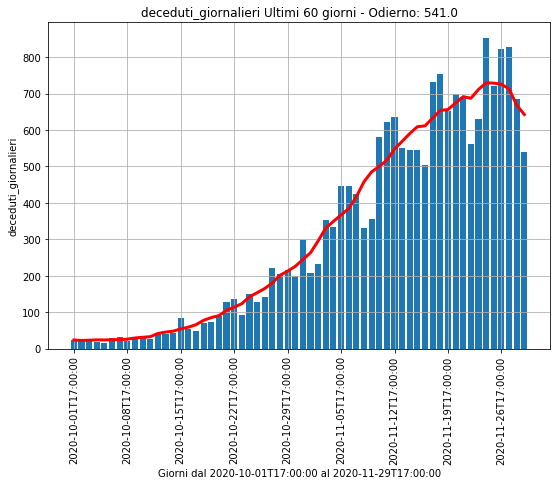

In [6]:
for indicatore in indicatori_selected:
    fig,ax=plt.subplots(1,figsize=figsize_single)
    # stampo il plot smooth con intervallo di confidenza
    '''
    confplot_ax(day_counter[-days_back:],
                   trend[indicatore]['Italia'][-days_back:],
                   window=(3,3),ax=ax,conf_fun='deviation')
    '''
    ax.bar(day_counter[-days_back:],
            trend[indicatore]['Italia'][-days_back:])
    ax.plot(day_counter[-days_back:],
            moving_function_robust(trend[indicatore]['Italia'][-days_back:],np.mean,3,3),color='r',linewidth=3)
    ax.set_title(indicatore+' Ultimi %d giorni - Odierno: %.1f'%(days_back,trend[indicatore]['Italia'][-1]))
    ax.set_xlabel('Giorni dal %s al %s'%(giorni[-days_back],giorni[-1]))
    ax.set_ylabel(indicatore)
    ax.grid()
    
    ax.set_xticks(list(range(len(giorni)-days_back,len(giorni),7)))
    ax.set_xticklabels(giorni[list(range(len(giorni)-days_back,len(giorni),7))],rotation=90)
    



In [7]:
indicatori_selected=['totale_positivi',
                     'deceduti_giornalieri',
                     'terapia_intensiva']

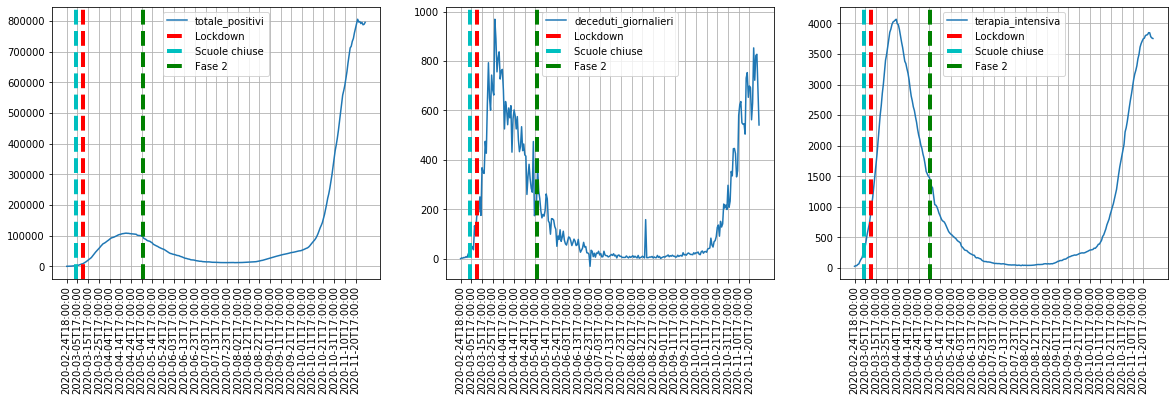

In [8]:
fig,ax=plt.subplots(1,3,figsize=(20,5))
for i,indicatore in enumerate(indicatori_selected):  
    ax[i].plot(day_counter,
             trend[indicatore]['Italia'],label=indicatore)
    ax[i].set_xticks(list(range(0,len(giorni),10)))
    ax[i].set_xticklabels(giorni[list(range(0,len(giorni),10))],rotation=90)
    ax[i].axvline(x=lockdown['id_giorno'],c='r', label='Lockdown',linewidth=4,ls='--')
    ax[i].axvline(x=scuole_chiuse['id_giorno'],c='c', label='Scuole chiuse',linewidth=4,ls='--')
    ax[i].axvline(x=fase_2['id_giorno'],c='g', label='Fase 2',linewidth=4,ls='--')
    ax[i].grid()
    ax[i].legend()

### Grafici per regione

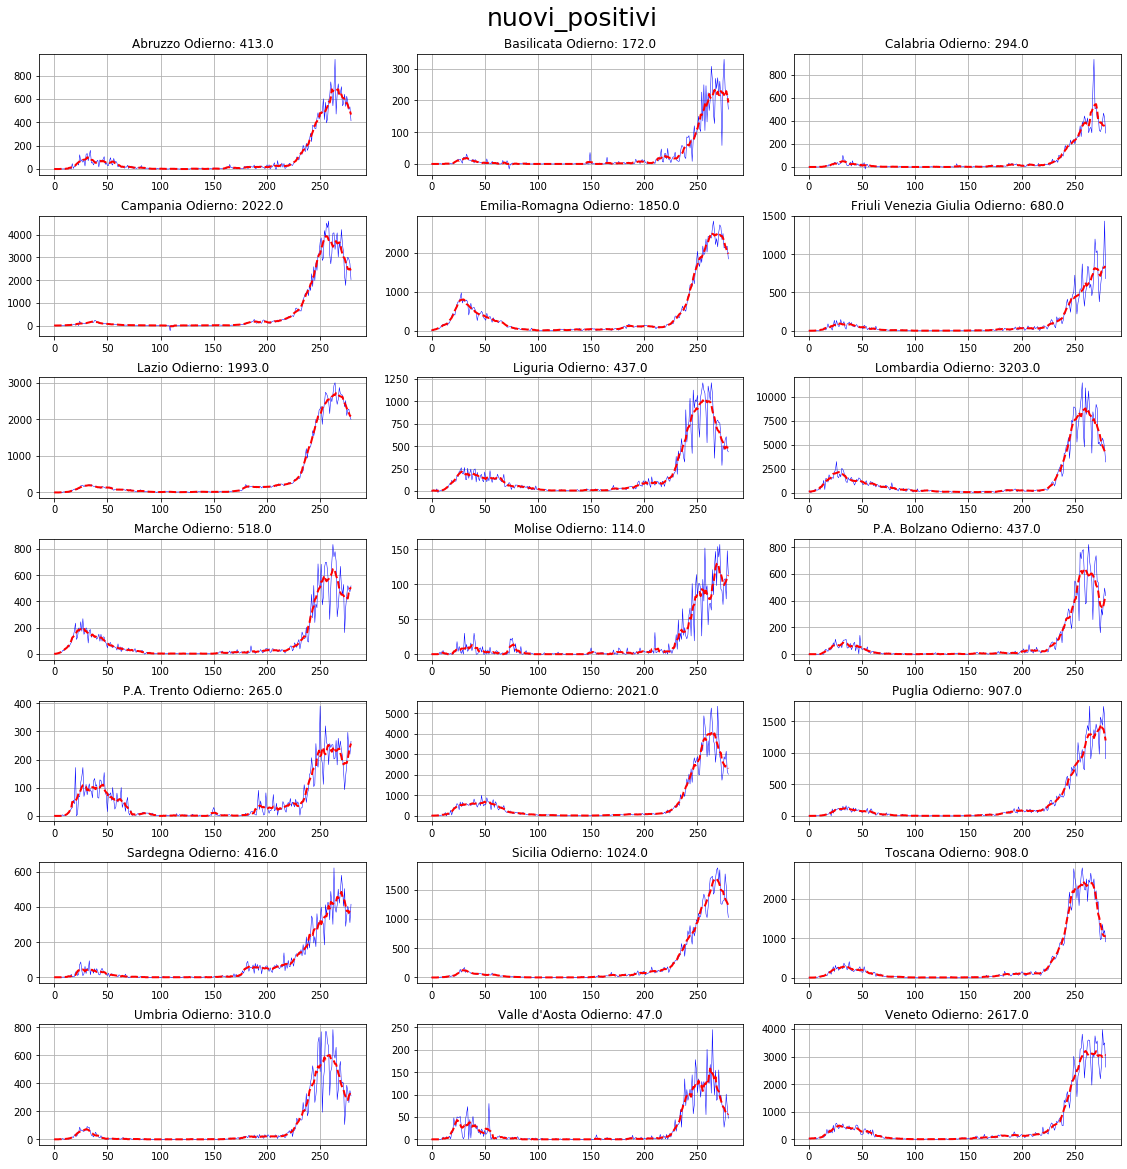

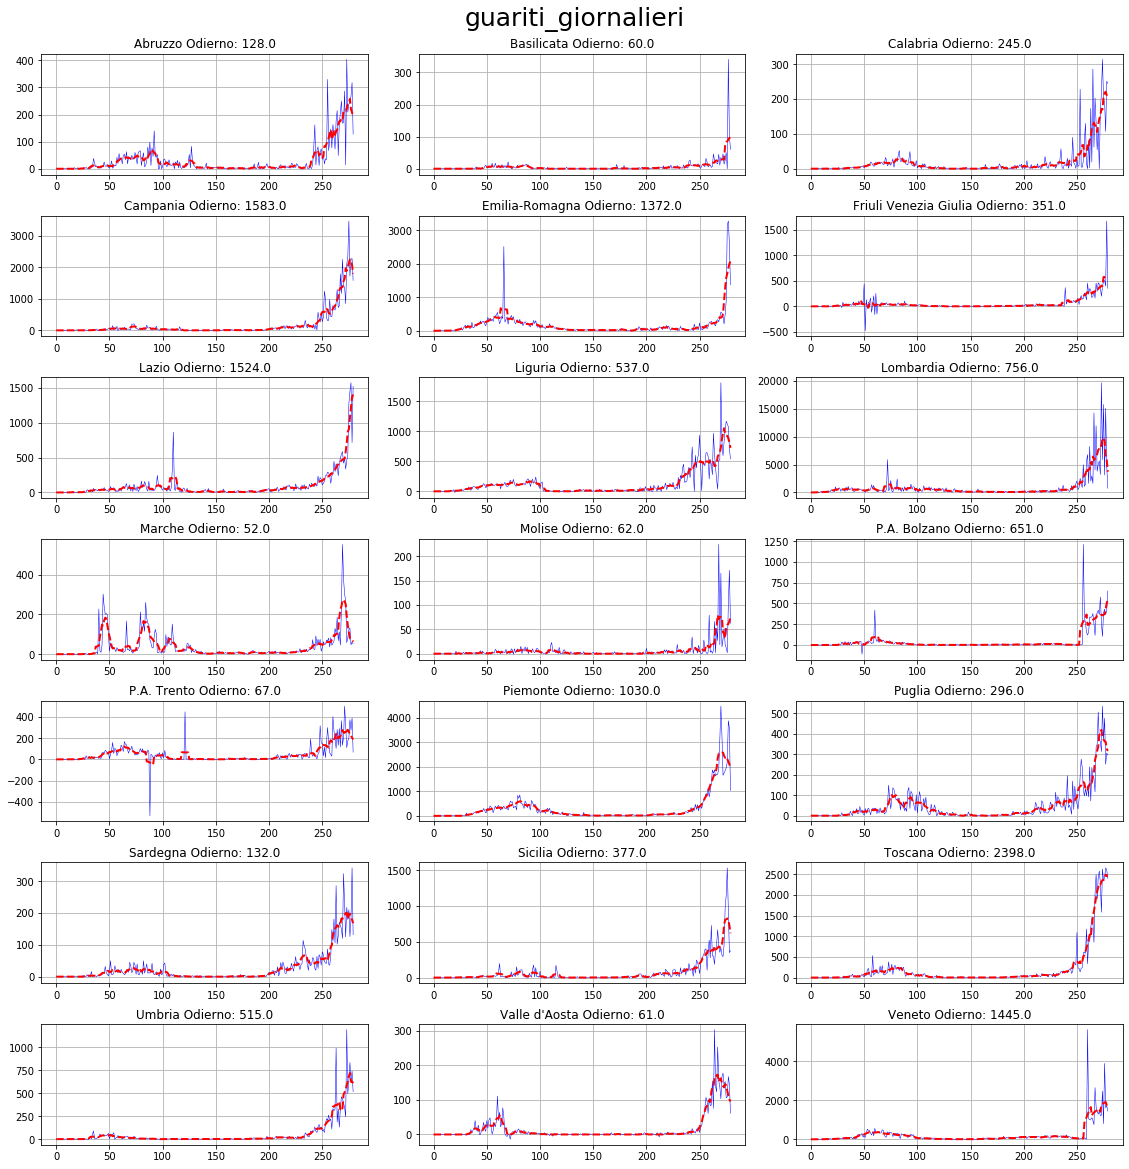

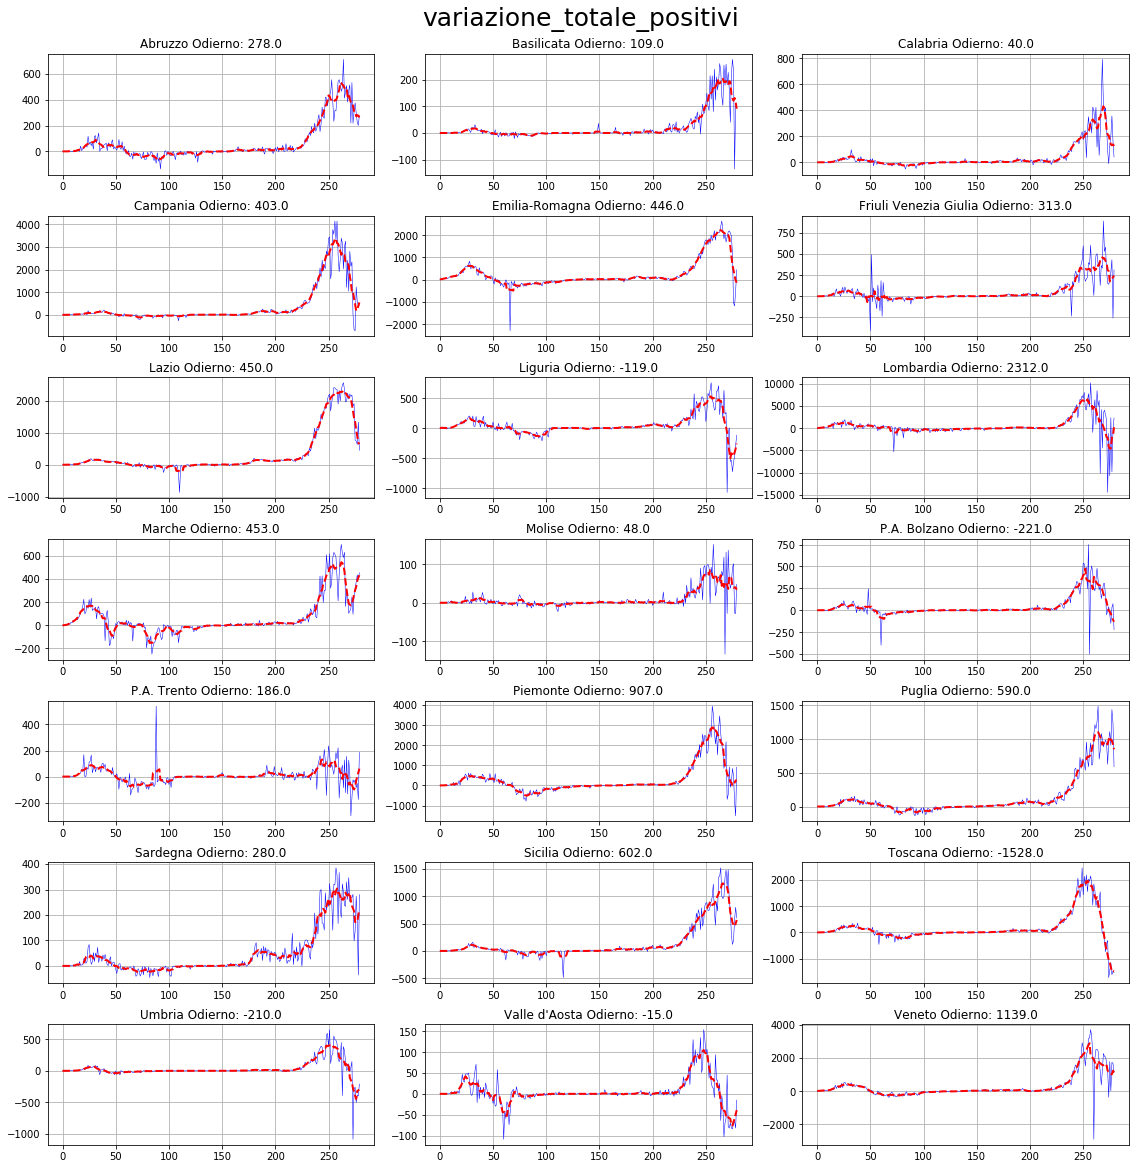

In [9]:
indicatori_selected=['nuovi_positivi',
                    'guariti_giornalieri',
                    'variazione_totale_positivi']


for indicatore in indicatori_selected:

    fig,ax=plt.subplots(grid_shape[0],grid_shape[1],sharey=False,figsize=figsize_multi)
    fig.suptitle(indicatore, y=1.02,fontsize=25)
    fig.tight_layout(pad=2.0)

    for i,regione in enumerate(regioni):
        ax[grid_seq[i]].plot(day_counter,trend[indicatore][regione],
                             'b-',linewidth=0.5,label='Reg')
        ax[grid_seq[i]].plot(day_counter,moving_function_robust(trend[indicatore][regione],np.mean,3,3),
                             'r--',linewidth=2,label='Trend')
        ax[grid_seq[i]].set_title(regione+' Odierno: %.1f'%trend[indicatore][regione][-1])
        #ax[grid_seq[i]].legend()
        ax[grid_seq[i]].grid()
    fig.savefig('PIC_%s.JPG'%indicatore)

## Deceduti nel tempo
**Italia Giornalieri**

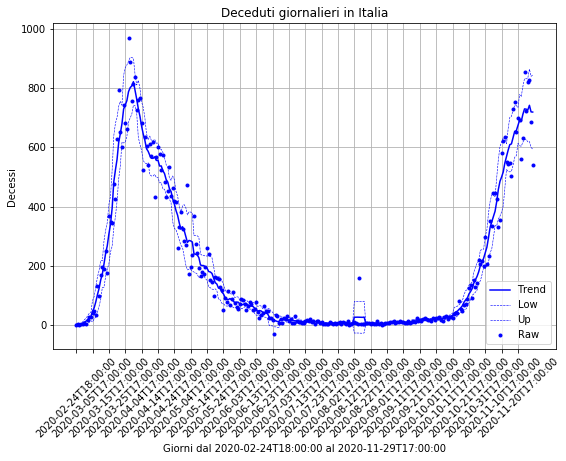

In [10]:
fig,ax=plt.subplots(1,figsize=figsize_single)
# stampo il plot smooth con intervallo di confidenza
confplot_ax(day_counter,
            trend['deceduti_giornalieri']['Italia'],
            window=(3,3),
            ax=ax,conf_fun='deviation', )
ax.set_title('Deceduti giornalieri in Italia')
ax.set_xlabel('Giorni dal %s al %s'%(giorni[0],giorni[-1]))
ax.set_ylabel('Decessi')
# stampo anche a punti il dato raw
ax.plot(trend['deceduti_giornalieri']['Italia'],'b.')
ax.legend(['Trend','Low','Up','Raw'])
ax.set_xticks(list(range(0,len(giorni),10)))
ax.set_xticklabels(giorni[list(range(0,len(giorni),10))],rotation=45)
ax.grid()

**Per regione giornalieri**

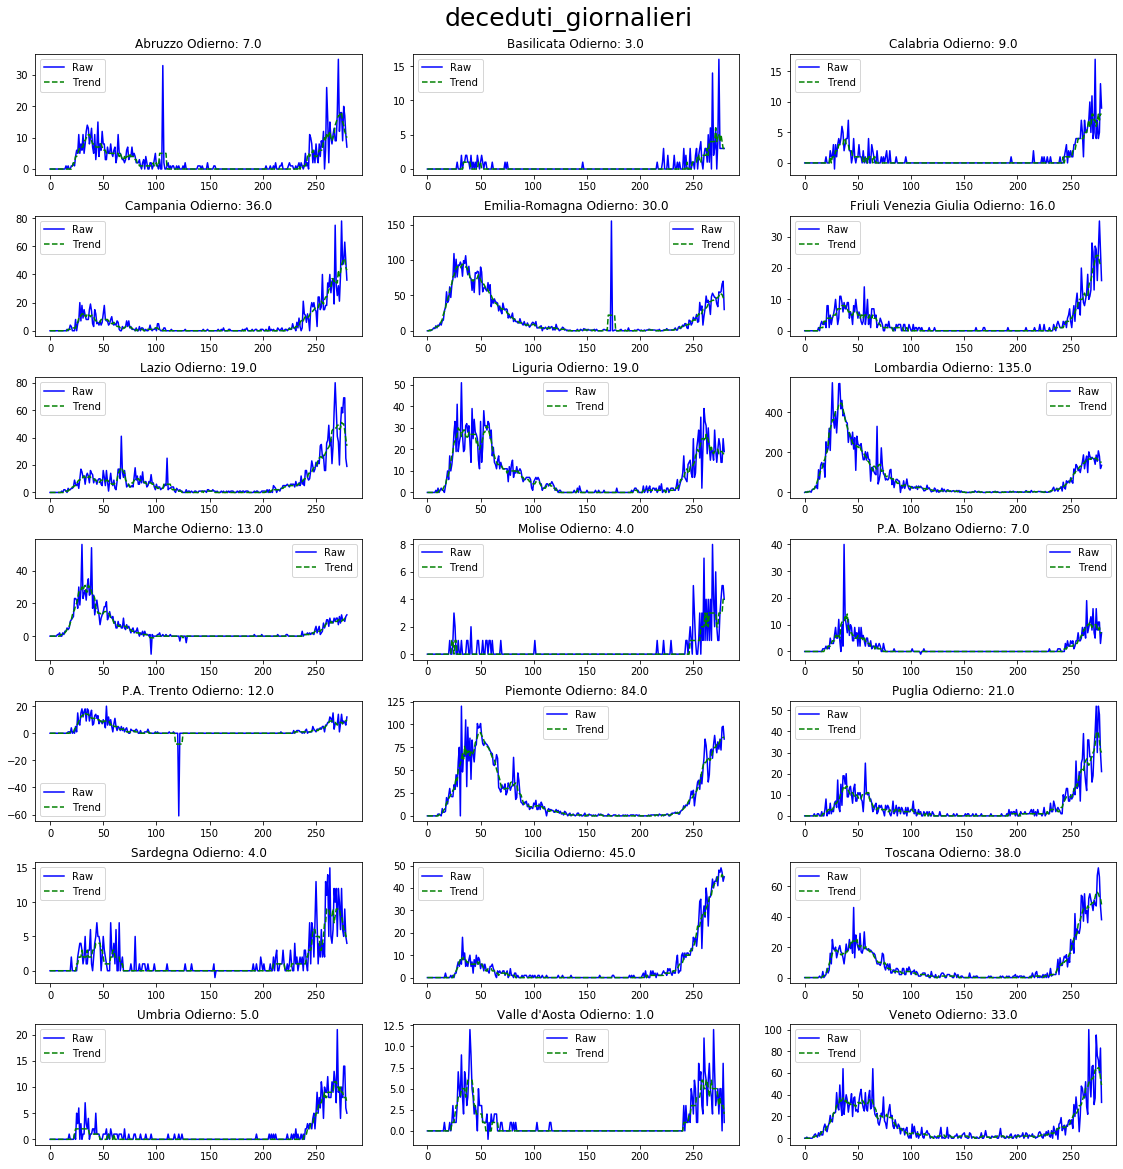

In [11]:
fig,ax=plt.subplots(grid_shape[0],grid_shape[1],sharey=False,figsize=figsize_multi)
fig.suptitle('deceduti_giornalieri', y=1.02,fontsize=25)
fig.tight_layout(pad=2.0)

for i,regione in enumerate(regioni):
    ax[grid_seq[i]].plot(day_counter,trend['deceduti_giornalieri'][regione],'b-',label='Raw')
    ax[grid_seq[i]].set_title(regione+' Odierno: %.1f'%trend['deceduti_giornalieri'][regione][-1])
    # plotto anche media
    ax[grid_seq[i]].plot(day_counter,
                         moving_function_robust(trend['deceduti_giornalieri'][regione],np.mean,3,3),
                         'g--',
                         label='Trend')
    ax[grid_seq[i]].legend()

### Indicatori per popolazione e per regione negli ultimi giorni

Si specifica la lista degli indicatori e i giorni indietro cui guardare per la produzione di grafici a barre

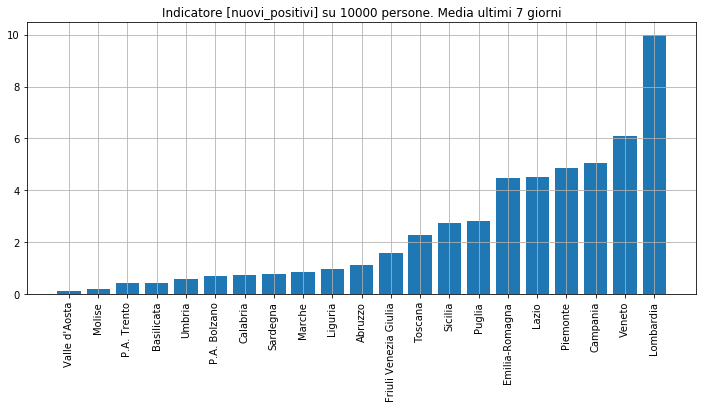

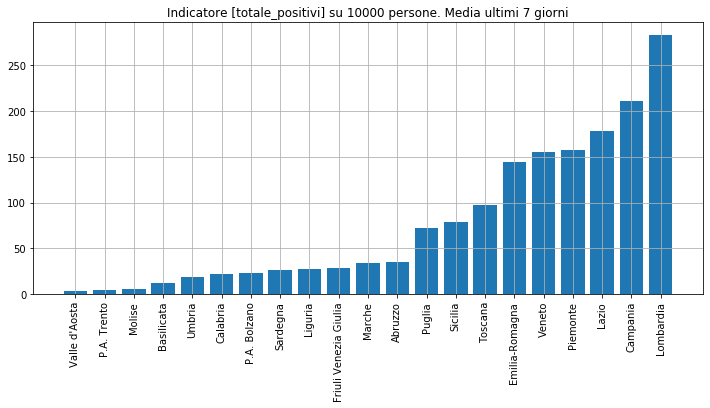

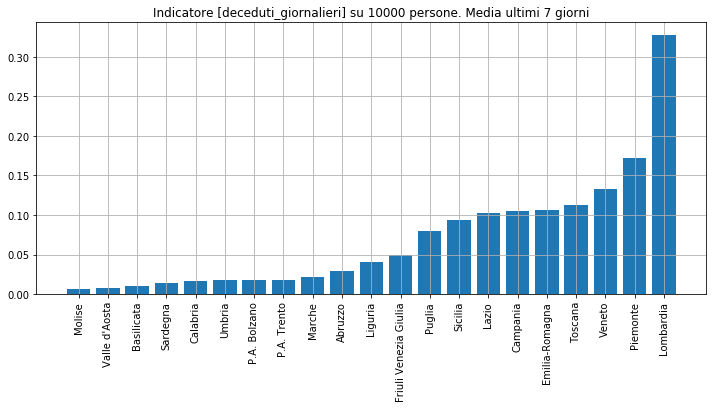

In [12]:
indicatori_selected=['nuovi_positivi','totale_positivi','deceduti_giornalieri']

ultimi_giorni=7
for indicatore in indicatori_selected:
    # calcolo la media da mostrare
    valori=[np.mean(trend[indicatore][r][-ultimi_giorni:])/popolazione[regione] for r in regioni]
    valori=np.array(valori)*10000
    ordine=np.argsort(valori)
    plt.figure(figsize=(12,5))
    plt.title('Indicatore [%s] su 10000 persone. Media ultimi %d giorni'%(indicatore,ultimi_giorni))
    plt.bar(range(len(regioni)),valori[ordine])
    plt.xticks(range(len(regioni)),regioni[ordine],rotation=90)
    plt.grid()
    plt.show()

### Situazione regione singola

In [13]:
# Selezione regione e indicatori da plottare

regione='Toscana'

indicatori_selected=['nuovi_positivi',
                     'guariti_giornalieri',
                     'deceduti_giornalieri',
                     'totale_positivi','variazione_totale_positivi']

num_indicatori=len(indicatori_selected)

In [14]:
trend['variazione_totale_positivi'][regione]

array([    0,     2,     0,     0,     5,     3,     2,     0,     6,
          19,    23,    18,    34,    53,    41,    54,    54,    38,
         103,   159,   149,    78,   183,   267,   131,   291,   192,
         239,   157,   218,   257,   197,   197,   341,   275,   264,
         176,   206,   357,   120,   145,   131,   116,   126,   130,
         146,   119,   170,   170,    95,    95,    65,   196,   -30,
        -113,    26,    72,    54,  -455,     4,   -38,    13,   -77,
         -86,   -87,  -233,   -79,  -211,    -8,   -37,   -49,   -89,
        -102,  -372,  -124,  -144,  -301,   -74,  -232,  -278,  -175,
        -220,  -225,  -141,  -229,  -250,  -206,  -240,   -91,   -20,
         -66,   -64,  -114,   -62,   -80,  -125,   -89,   -55,   -29,
         -71,   -38,   -90,   -26,   -72,   -35,   -29,   -93,   -89,
         -18,   -11,    -8,    -3,   -10,   -26,   -19,    -6,   -15,
          -9,   -49,    -5,   -23,    -7,    -6,   -10,     4,     5,
           4,     2,

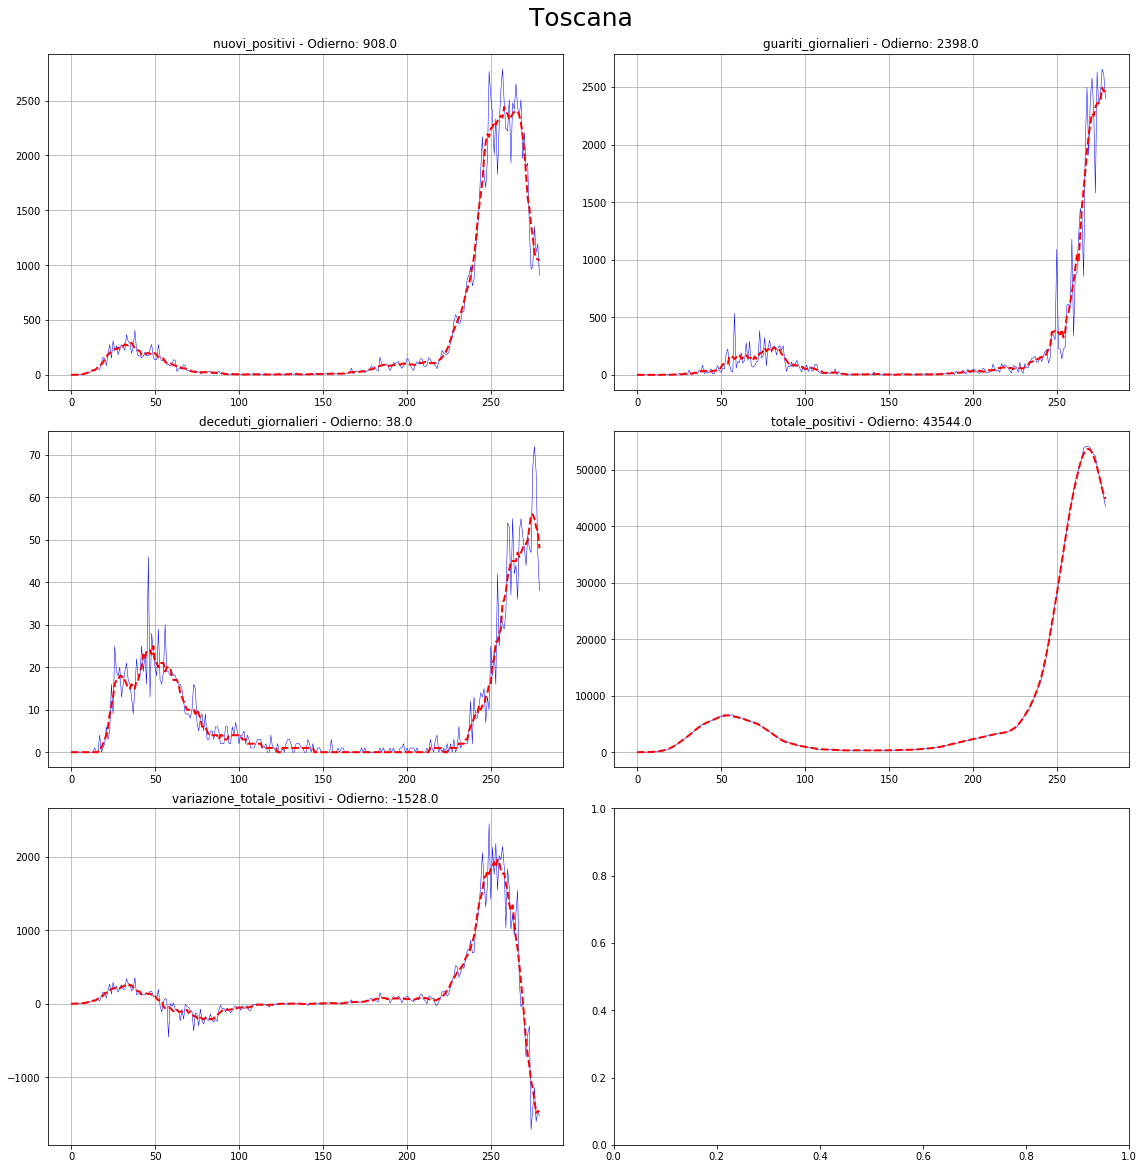

In [15]:
grid_shape=auto_grid_shape(num_indicatori,cols=2)
grid_seq=get_subplot_cells_sequence(grid_shape)

fig,ax=plt.subplots(grid_shape[0],grid_shape[1],figsize=figsize_multi)
fig.suptitle(regione, y=1.02,fontsize=25)
fig.tight_layout(pad=2.0)


for i,indicatore in enumerate(indicatori_selected):
    ax[grid_seq[i]].plot(day_counter,trend[indicatore][regione],
                         'b-',linewidth=0.5,label='Reg')
    ax[grid_seq[i]].plot(day_counter,moving_function_robust(trend[indicatore][regione],np.mean,3,3),
                         'r--',linewidth=2,label='Trend')
    ax[grid_seq[i]].set_title(indicatore+' - Odierno: %.1f'%trend[indicatore][regione][-1])
    #ax[grid_seq[i]].legend()
    ax[grid_seq[i]].grid()

### Relazione fra deceduti e terapia intensiva

In [16]:
from sklearn.linear_model import LinearRegression

var_indip='terapia_intensiva'

lr=LinearRegression()
lr.fit(trend[var_indip]['Italia'].reshape(-1, 1),
         trend['deceduti_giornalieri']['Italia'])

newx=np.linspace(0,max(trend[var_indip]['Italia'])).reshape(-1,1)

lry=lr.predict(newx)

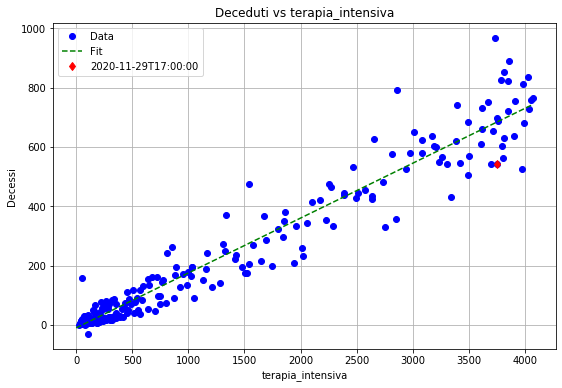

In [17]:
plt.figure(figsize=figsize_single)
plt.plot(trend[var_indip]['Italia'],
         trend['deceduti_giornalieri']['Italia'],
        'bo',label='Data',)

plt.plot(newx,
         lry,
        'g--',label='Fit',)

plt.plot(trend[var_indip]['Italia'][-1],
         trend['deceduti_giornalieri']['Italia'][-1],
        'rd',label=giorni[-1],)


plt.title('Deceduti vs %s'%var_indip)
plt.xlabel(var_indip)
plt.ylabel('Decessi')
plt.legend()
plt.grid()

## Deceduti vs Guariti

Trend della percentuale giornaliera di **deceduti** e **guariti** rispetto al numero di *attualmente* infetti (al giorno precedente)

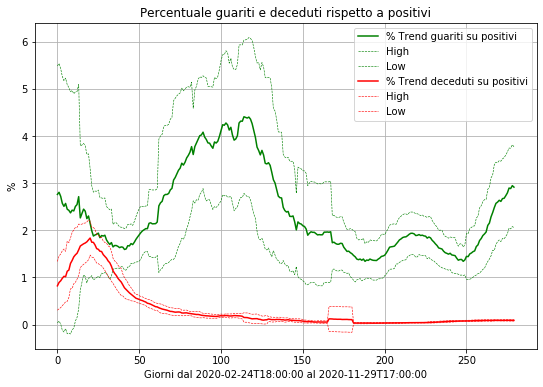

In [18]:
fig,ax=plt.subplots(1,figsize=figsize_single)
# stampo il plot smooth con intervallo di confidenza
confplot_ax(day_counter,
            trend['perc_guariti_su_positivi']['Italia'],
            window=(10,10),
            ax=ax,conf_fun='deviation',color='g')
confplot_ax(day_counter,
            trend['perc_deceduti_su_positivi']['Italia'],
            window=(7,7),
            ax=ax,conf_fun='deviation',color='r')

ax.set_title('Percentuale guariti e deceduti rispetto a positivi')
ax.set_xlabel('Giorni dal %s al %s'%(giorni[0],giorni[-1]))
ax.set_ylabel('%')
# stampo anche a punti il dato raw
#ax.plot(trend['perc_guariti_su_positivi']['Italia'],'g.')
#ax.plot(trend['perc_deceduti_su_positivi']['Italia'],'r.')
ax.legend(['% Trend guariti su positivi','High','Low',
           '% Trend deceduti su positivi','High','Low',
           '% Raw guariti su positivi',
           '% Raw deceduti su positivi'])
ax.grid()

C:\Users\klaat\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.
C:\Users\klaat\AppData\Roaming\Python\Python37\site-packages\numpy\lib\nanfunctions.py:1667: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


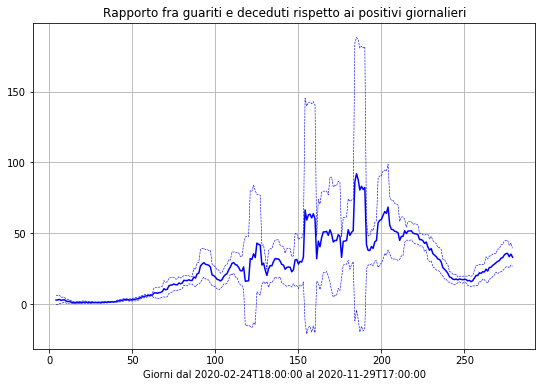

In [19]:
fig,ax=plt.subplots(1,figsize=figsize_single)
# stampo il plot smooth con intervallo di confidenza
confplot_ax(day_counter,
            trend['perc_guariti_su_positivi']['Italia']/trend['perc_deceduti_su_positivi']['Italia'],
            window=(3,3),
            ax=ax,conf_fun='deviation')
ax.set_title('Rapporto fra guariti e deceduti rispetto ai positivi giornalieri')
ax.set_xlabel('Giorni dal %s al %s'%(giorni[0],giorni[-1]))
# stampo anche a punti il dato raw
#ax.plot(trend['perc_guariti_su_positivi']['Italia']/trend['perc_deceduti_su_positivi']['Italia'],'bx')
#ax.legend(['Trend','Low','Up','Raw'])
ax.grid()


## Provenienza nuovi positivi

I *nuovi positivi* definiti tramite i tamponi possono essere individuati a causa di:
- presenza di sintomi specifici (**casi_da_sospetto_diagnostico**)
- screening preventivo (**casi_da_screening**)

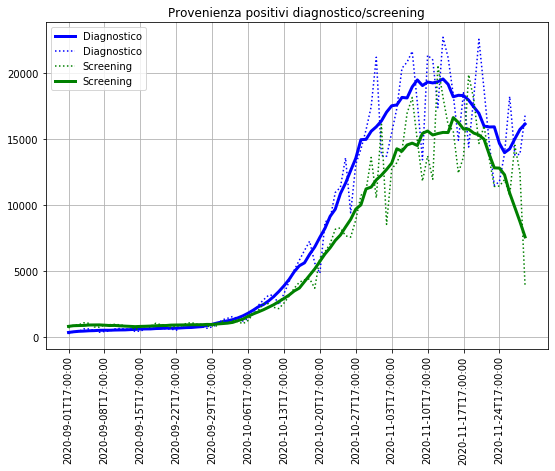

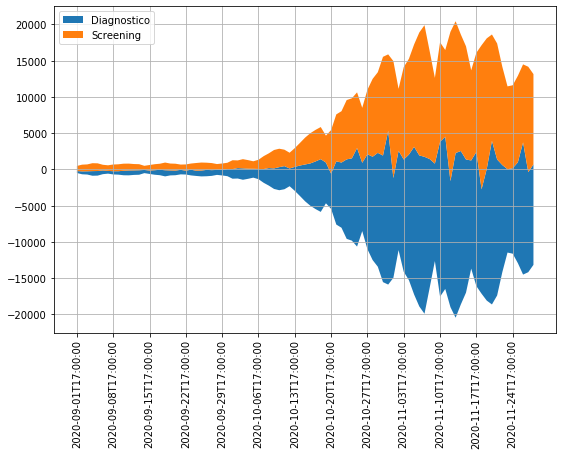

In [20]:
first_day=-90
last_day=-1


fig,ax=plt.subplots(1,figsize=figsize_single)
ax.plot(day_counter[first_day:],
        moving_function_robust(trend['casi_da_sospetto_diagnostico_giornalieri']['Italia'][first_day:],np.mean,3,3),
        label='Diagnostico',color='b',linewidth=3)
ax.plot(day_counter[first_day:],
        trend['casi_da_sospetto_diagnostico_giornalieri']['Italia'][first_day:],
        label='Diagnostico',color='b',linestyle='dotted')
ax.plot(day_counter[first_day:],
        trend['casi_da_screening_giornalieri']['Italia'][first_day:],
        label='Screening',color='g',linestyle='dotted')
ax.plot(day_counter[first_day:],
        moving_function_robust(trend['casi_da_screening_giornalieri']['Italia'][first_day:],np.mean,3,3),
        label='Screening',color='g',linewidth=3)
ax.set_title('Provenienza positivi diagnostico/screening')
ax.set_xticks(list(range(day_counter[first_day],day_counter[-1],7)))
ax.set_xticklabels(giorni[list(range(day_counter[first_day],day_counter[-1],7))],rotation=90)
ax.grid()
ax.legend()

fig,ax=plt.subplots(1,figsize=figsize_single)
ax.stackplot(day_counter[first_day:last_day],
             trend['casi_da_sospetto_diagnostico_giornalieri']['Italia'][first_day:last_day],
             trend['casi_da_screening_giornalieri']['Italia'][first_day:last_day],
             labels=['Diagnostico','Screening'],
             baseline='sym')
ax.set_xticks(list(range(day_counter[first_day],day_counter[last_day],7)))
ax.set_xticklabels(giorni[list(range(day_counter[first_day],day_counter[last_day],7))],rotation=90)
ax.grid()
ax.legend(loc='upper left')



In [21]:
print(trend['casi_da_screening_giornalieri']['Italia'][-5:])
print(trend['casi_da_sospetto_diagnostico_giornalieri']['Italia'][-5:])

[11935. 10766. 14541. 12458.  3862.]
[13917. 18235. 13801. 13857. 16784.]


## Analisi per giorno della settimana

In [22]:
diz_day={0:'DO',
        1:'LU',
        2:'MA',
        3:'ME',
        4:'GI',
        5:'VE',
        6:'SA'}

In [23]:
indicatore='nuovi_positivi'
operando=np.mean

last_days=60
counter=np.zeros((7))

temp_vals=trend[indicatore]['Italia'][-last_days:]

In [24]:
for d in range(7):
    indici_day=find_matlabstyle(giorno_settimana[-last_days:],lambda x:x==d)
    counter[d]=operando(temp_vals[indici_day])

In [25]:
counter

array([16379.25      , 20026.375     , 21855.75      , 21820.22222222,
       23601.44444444, 23227.88888889, 20722.11111111])

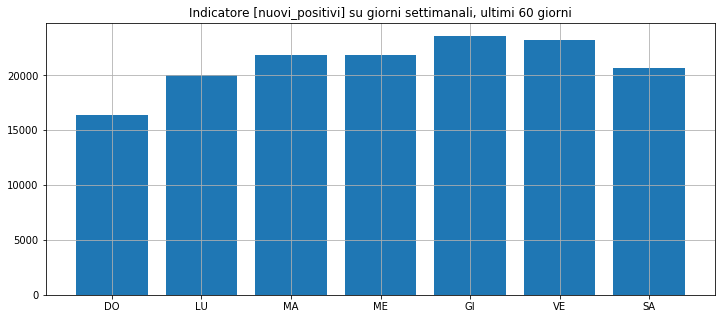

In [26]:
plt.figure(figsize=(12,5))
plt.title('Indicatore [%s] su giorni settimanali, ultimi %d giorni'%(indicatore,last_days))
plt.bar(range(7),counter)
plt.xticks(range(7),list(diz_day.values()))
plt.grid()
plt.show()